## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [1]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [3]:
# Carregar o dataset (supondo que você já tem o arquivo e o dataframe)
data = pd.read_csv('housing.csv')

# Evitar o uso de inplace=True com chained assignment
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())

# Converter variáveis categóricas em dummies
data = pd.get_dummies(data)

# Definir as features e a variável alvo (target)
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Divisão treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar árvore de decisão com profundidade 8
tree_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_depth_8.fit(X_train, y_train)

# Treinar árvore de decisão com profundidade 2
tree_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_depth_2.fit(X_train, y_train)

# Avaliar o desempenho no conjunto de treinamento
y_train_pred_8 = tree_depth_8.predict(X_train)
y_test_pred_8 = tree_depth_8.predict(X_test)

y_train_pred_2 = tree_depth_2.predict(X_train)
y_test_pred_2 = tree_depth_2.predict(X_test)

# Calcular o MSE
mse_train_8 = mean_squared_error(y_train, y_train_pred_8)
mse_test_8 = mean_squared_error(y_test, y_test_pred_8)

mse_train_2 = mean_squared_error(y_train, y_train_pred_2)
mse_test_2 = mean_squared_error(y_test, y_test_pred_2)

# Exibir os resultados
print(f"Erro Quadrático Médio - Árvore Profundidade 8 (Treinamento): {mse_train_8}")
print(f"Erro Quadrático Médio - Árvore Profundidade 8 (Teste): {mse_test_8}")

print(f"Erro Quadrático Médio - Árvore Profundidade 2 (Treinamento): {mse_train_2}")
print(f"Erro Quadrático Médio - Árvore Profundidade 2 (Teste): {mse_test_2}")


Erro Quadrático Médio - Árvore Profundidade 8 (Treinamento): 3253976845.988395
Erro Quadrático Médio - Árvore Profundidade 8 (Teste): 3903180820.8702917
Erro Quadrático Médio - Árvore Profundidade 2 (Treinamento): 6710572662.339577
Erro Quadrático Médio - Árvore Profundidade 2 (Teste): 6893607949.701682


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

CCP-alphas: [0.00000000e+00 2.52335571e-05 3.02810078e-05 ... 7.44333012e+08
 1.67533461e+09 4.23754184e+09]
Impurities: [0.00000000e+00 5.04671141e-05 8.07481219e-05 ... 7.45490567e+09
 9.13024028e+09 1.33677821e+10]


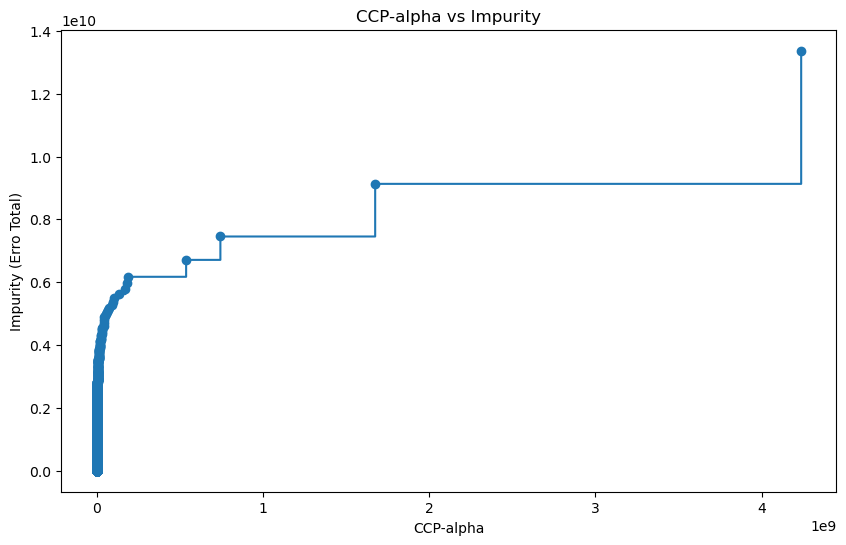

In [5]:
# Treinando a árvore de regressão
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Obter o caminho da poda com CCP-alpha
path = tree_reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Exibir os valores de CCP-alphas e impurezas
print("CCP-alphas:", ccp_alphas)
print("Impurities:", impurities)

# Plotar CCP-alphas vs impureza
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
plt.xlabel('CCP-alpha')
plt.ylabel('Impurity (Erro Total)')
plt.title('CCP-alpha vs Impurity')
plt.show()

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [7]:

from sklearn.tree import DecisionTreeRegressor


# Supondo que ccp_alphas foi obtido previamente
# Lista para armazenar as árvores treinadas
trees = []

# Verifique se ccp_alphas está definido e não está vazio
if 'ccp_alphas' in locals() and len(ccp_alphas) > 0:
    print("Valores de CCP-alphas:", ccp_alphas)  # Exibir os valores
else:
    print("ccp_alphas não está definido ou está vazio.")

# Para cada valor de ccp_alpha, treinar uma nova árvore e adicioná-la à lista
for i, ccp_alpha in enumerate(ccp_alphas):
    tree = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)

    # Imprimir a cada 10 árvores treinadas
    if i % 1000 == 0:  # Ajuste o intervalo conforme necessário
        print(f"Treinando árvore {i + 1} com CCP-alpha: {ccp_alpha:.5f}")

# Exibir quantas árvores foram treinadas após o loop
print(f"Número total de árvores treinadas: {len(trees)}")



Valores de CCP-alphas: [0.00000000e+00 2.52335571e-05 3.02810078e-05 ... 7.44333012e+08
 1.67533461e+09 4.23754184e+09]
Treinando árvore 1 com CCP-alpha: 0.00000


KeyboardInterrupt: 

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Treinando a árvore de regressão inicial
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Obter o caminho da poda com CCP-alpha
path = tree_reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Verificando se ccp_alphas e impurities não estão vazios
print("CCP-alphas:", ccp_alphas)
print("Impurities:", impurities)

# Lista para armazenar as árvores treinadas
trees = []

# Para cada valor de ccp_alpha, treinar uma nova árvore e adicioná-la à lista
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)

# Verifique quantas árvores foram treinadas
print("Número de árvores treinadas:", len(trees))

# Listas para armazenar os MSEs
train_mse = []
test_mse = []

# Calcular o MSE de cada árvore na lista
for tree in trees:
    # Previsões no conjunto de treinamento
    y_train_pred = tree.predict(X_train)
    # Previsões no conjunto de teste
    y_test_pred = tree.predict(X_test)
    
    # Calcular MSE no conjunto de treinamento e teste
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

# Exibir os MSEs para comparação
for i, ccp_alpha in enumerate(ccp_alphas):
    print(f"CCP-alpha: {ccp_alpha:.5f} - MSE (Treinamento): {train_mse[i]:.5f}, MSE (Teste): {test_mse[i]:.5f}")


CCP-alphas: [0.00000000e+00 2.52335571e-05 3.02810078e-05 ... 7.44333012e+08
 1.67533461e+09 4.23754184e+09]
Impurities: [0.00000000e+00 5.04671141e-05 8.07481219e-05 ... 7.45490567e+09
 9.13024028e+09 1.33677821e+10]


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

### 7. Visualize esta árvore.